# 0.0. IMPORTS

In [1]:
import pandas as pd
import numpy as np
import inflection
import math
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML

## 0.1. Helper Functions

Seção para construção de funções auxiliares para o projeto

In [40]:
def jupyter_settings():
    %matplotlib inline
    #%pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 20
    display( HTML( '<style>.container { width:97% !important; }</style>') )
    pd.options.display.max_columns = 50
    pd.options.display.max_rows = 50
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    
    return None

In [41]:
jupyter_settings()

## 0.2. Loading Data

Carregamento dos dados - Extração

In [4]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory = False)
df_store_raw = pd.read_csv('data/store.csv', low_memory = False)

# merge 
df_raw = pd.merge(df_sales_raw, df_store_raw, how = 'left', on = 'Store' )

In [4]:
df_sales_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df_store_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1.0. DESCRIÇÃO DOS DADOS

In [5]:
### Cópia do dataframe em início de sessão 
### OBJETIVO: Caso seja realizado alguma instrução errada sob os dados trabalhados, poder ter um ponto de backup.

df1 = df_raw.copy()

## 1.1. Rename Columns

Ter o nome das colunas de maneira mais intuitiva para trabalhar com ciência de dados

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
           'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
           'CompetitionDistance', 'CompetitionOpenSinceMonth',
           'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
           'Promo2SinceYear', 'PromoInterval']

## Utiliza função lambda para encapsular a função que transforma para snake_case os atributos
snakecase = lambda x: inflection.underscore( x )

## Map - Mapeia cada valor dentro da estrutura de dado passada e aplica a função snakecase
cols_new = list( map( snakecase, cols_old ) )

## rename 
df1.columns = cols_new

In [8]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2. Data Dimensions

In [9]:
print(f'Number of Rows: {df1.shape[0]}')
print(f'Number of Cols: {df1.shape[1]}')

#print( 'Number of Rows: {}'.format( df1.shape[0] ) )
#print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1017209
Number of Cols: 18


## 1.3. Data Types

In [7]:
## Arrumar para a coluna date ficar com o tipo de dado correto
df1['date'] = pd.to_datetime( df1['date'] )


In [10]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [15]:
# MÉTODO .isna() vai varrer o dataset indicando para cada valor de linha e coluna se possui valor ou está NA e indicar com 
# True ou False 
# .sum() para somar os valores True nas colunas e dar dimensão de dados faltantes por coluna

df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [8]:
#competition_distance    

# Assumptions: o valor NA ocorre quando a loja em questão não possui competidor próximo ou esse é tão longe que não é 
# considerado competidor próximo

# Action: substituir os NA´s por um valor maior que o valor máximo existente para outras lojas

df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x)

In [9]:
#competition_open_since_month   

# Assumptions: se a loja não possui competidor próximo, até faz sentido essa coluna ser 0 ou NA, porque não existe data de 
# abertura se não existe loja, mas a questão é que existe mais faltante nessa coluna que na coluna de distância de competidor
# próximo. 

# Action: substituir os NA´s pelo valor do mês da data de venda do histórico de vendas da loja. (sem muita lógica)

df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) 
                                                else x['competition_open_since_month'], axis = 1)

In [10]:
#competition_open_since_year     

# Assumptions: se a loja não possui competidor próximo, até faz sentido essa coluna ser 0 ou NA, porque não existe data de 
# abertura se não existe loja, mas a questão é que existe mais faltante nessa coluna que na coluna de distância de competidor
# próximo. 

# Action: substituir os NA´s pelo valor do ano da data de venda do histórico de vendas da loja. (sem muita lógica)


df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) 
                                                else x['competition_open_since_year'], axis = 1)

In [11]:
#promo2_since_week               

# Assumptions: os NA´s ocorrem em lojas que não participam da promo2, pois não existe semana de início da promo2 se a loja
# decidiu não participar. 

# Action: substituir os NA´s pelo valor da semana da data de venda do histórico de vendas da loja. (sem muita lógica)

df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) 
                                                else x['promo2_since_week'], axis = 1)

In [12]:
#promo2_since_year               

# Assumptions: os NA´s ocorrem em lojas que não participam da promo2, pois não existe ano de início da promo2 se a loja
# decidiu não participar. 

# Action: substituir os NA´s pelo valor do ano da data de venda do histórico de vendas da loja. (sem muita lógica)

df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) 
                                                else x['promo2_since_year'], axis = 1)

In [13]:
#promo_interval

# Assumptions: épocas de promoção 2 são conjuntos de meses que caracterizam o início de promoções 2. O NA nessa coluna 
# caracteriza que a loja referida não realizou promoções em nenhum mês do ano da referente data. 

# Action: substituir os NA´s por 0 pois significa que não tem época de promoção naquele ano. 
# Criar coluna extra ('is_promo') para indicar se mês de venda da loja vigente é o mês de promo2 consecutiva. 

month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}

df1['promo_interval'].fillna(0, inplace = True)

#month_map é a abreviação do mês de mensuração de venda
df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['month_map','promo_interval']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if 
                                                            x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis = 1)

## 1.6. Change Types

Após seção de manipulação, criação de colunas é interessante novamente organizar os tipos de dados

In [38]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [14]:
### Mudar nº de mês, ano e semana de float64 para int64

df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( 'int64' )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( 'int64' )

df1['promo2_since_week'] = df1['promo2_since_week'].astype( 'int64' )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( 'int64' )

## 1.7. Descriptive Statistical

In [15]:
## Separar atributos/colunas em numéricas e categóricas

num_attributes = df1.select_dtypes( include = ['int64','float64'] )
cat_attributes = df1.select_dtypes( exclude = ['int64','float64','datetime64[ns]'] )

### 1.7.1. Numerical Attributes

In [16]:
# Option 1

# Central Tendency - mean, median

ct1 = pd.DataFrame( num_attributes.apply( np.mean ) )
ct2 = pd.DataFrame( num_attributes.apply( np.median ) )

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) )
d2 = pd.DataFrame( num_attributes.apply( min ) )
d3 = pd.DataFrame( num_attributes.apply( max ) )
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) )
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) )
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) )

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6], axis = 1 ).reset_index()

m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']

# Option 2

## Min, Max, Range, Mean, Median, Std, Skew, Kurtosis
num_attributes.agg(['min', 'max', 'ptp', 'mean', 'median', 'std', 'skew', 'kurtosis']).T.reset_index().rename(columns={'index': 'attributes', 'ptp': 'range'})

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908651,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997391,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.926175,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411734,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485759,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.652996,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311087,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515593,-7.235657,124.071304


C:\Users\alanc\AppData\Local\Temp\ipykernel_12928\710812770.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['sales'])


<AxesSubplot:xlabel='sales', ylabel='Density'>

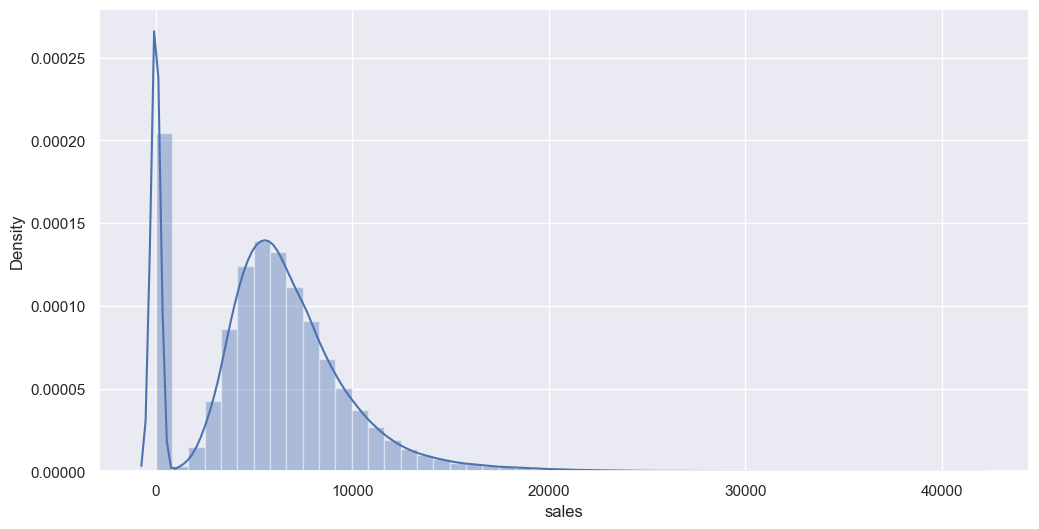

In [33]:
sns.distplot(df1['sales'])

C:\Users\alanc\AppData\Local\Temp\ipykernel_12928\3380288980.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['competition_distance'])


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

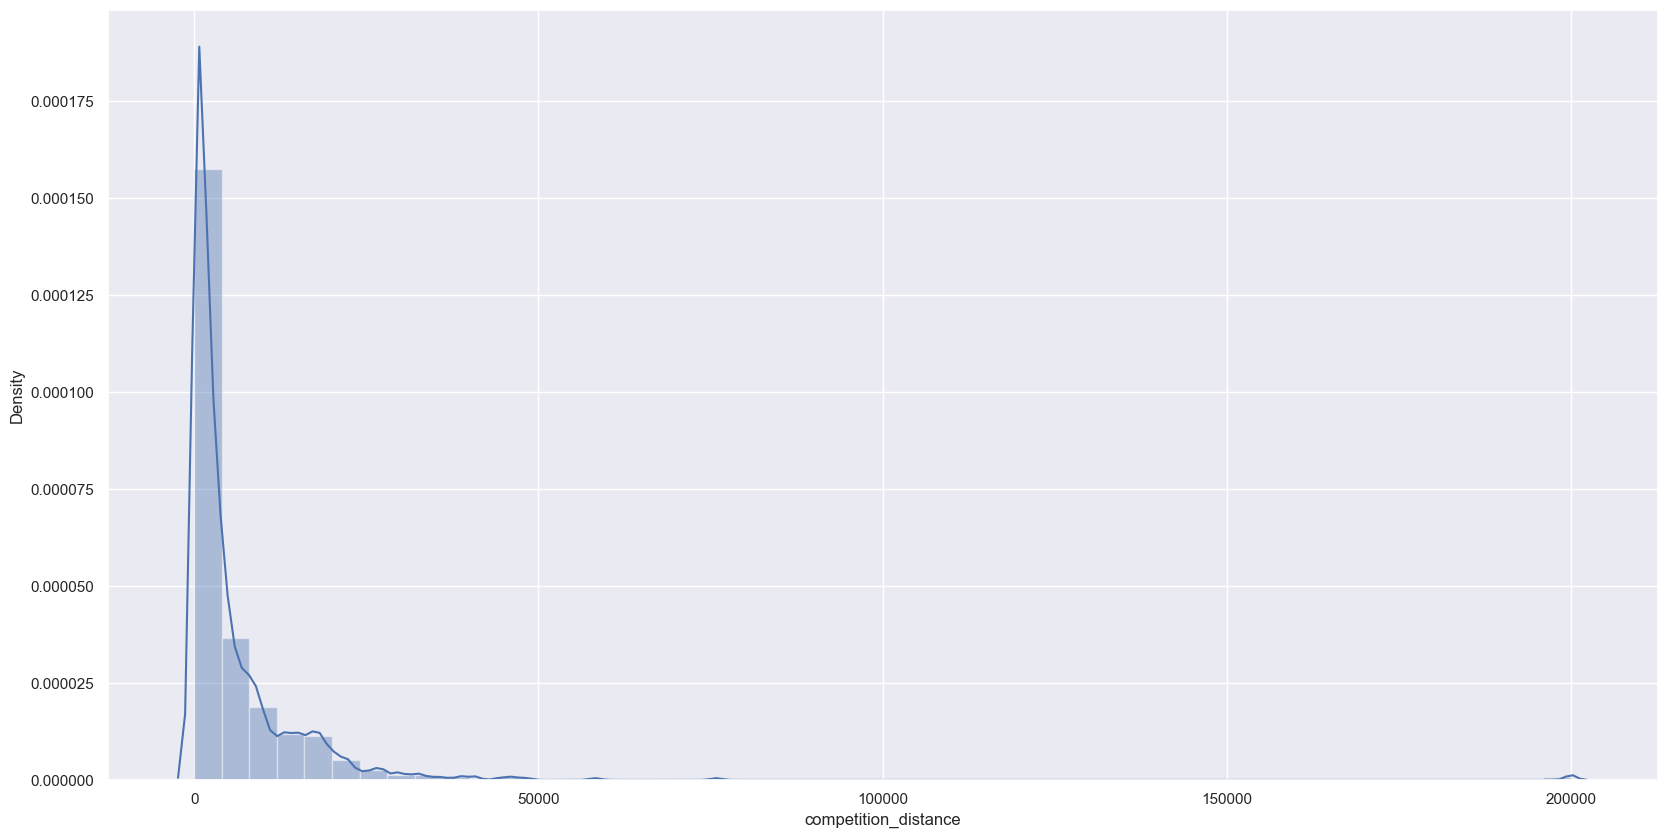

In [44]:
sns.distplot(df1['competition_distance'])

### 1.7.2. Categorical Attributes

In [21]:
# Valores únicos de cada uma das categorias 

cat_attributes.apply( lambda x: x.nunique() )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

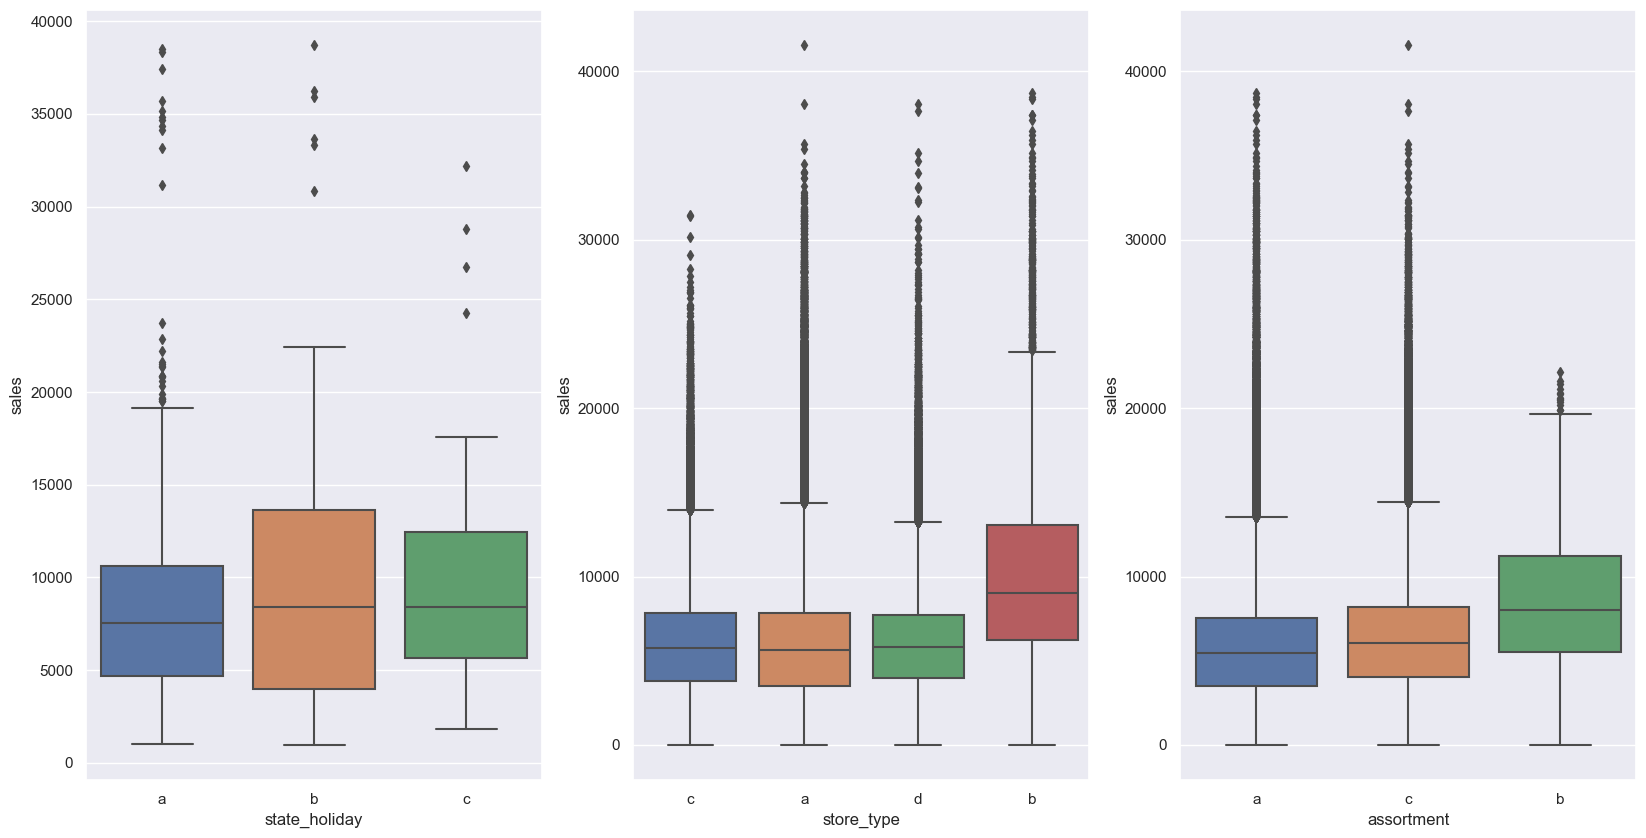

In [42]:
# Filtrar para enxergar melhor situação de loja aberta (vendas > 0) em feriados ('state_holiday' != '0') 
aux1 = df1[ (df1['state_holiday'] != '0') & (df1['sales'] > 0)]

# Performance Vendas nos Feriados
plt.subplot( 1, 3, 1)
sns.boxplot(x = 'state_holiday', y = 'sales', data = aux1 )

# Performance Vendas por tipo de loja
plt.subplot( 1, 3, 2)
sns.boxplot(x = 'store_type', y = 'sales', data = df1 )

# Performance Vendas por sortimento de produtos
plt.subplot( 1, 3, 3)
sns.boxplot(x = 'assortment', y = 'sales', data = df1 )

<AxesSubplot:xlabel='month_map', ylabel='sales'>

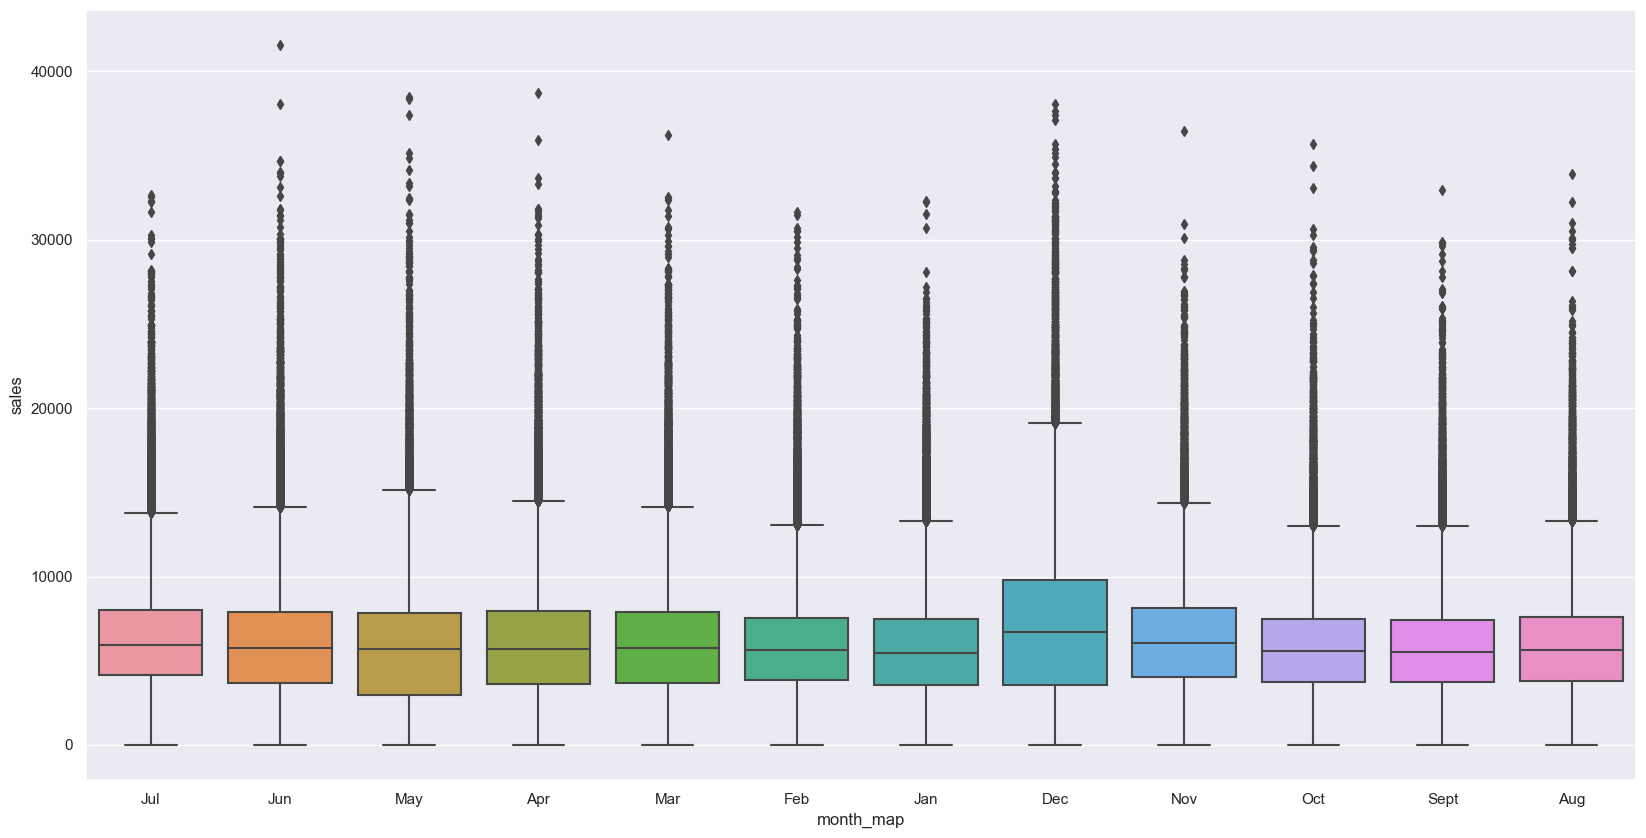

In [43]:
# Quantidade de vendas por mês

sns.boxplot(x = 'month_map', y = 'sales', data = df1 )